In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('../data/sales_train.csv')
data.date = pd.to_datetime(data.date, format=('%d.%m.%Y'))
display(data.tail())
data.info()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
2935844 2015-10-10              33       25     7409       299.0           1.0
2935845 2015-10-09              33       25     7460       299.0           1.0
2935846 2015-10-14              33       25     7459       349.0           1.0
2935847 2015-10-22              33       25     7440       299.0           1.0
2935848 2015-10-03              33       25     7460       299.0           1.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [3]:
def mode_of_freq(data, key='date', freq='D', mode='sum'):
    # 時系列(key)について日毎(D)の売上数の合計値(sum)で出力
    mode_of_key = getattr(data.groupby(pd.Grouper(key=key, freq=freq)), mode)
    return mode_of_key()

In [4]:
data_by_day = mode_of_freq(data).item_cnt_day
data_by_day.shape

(1034,)

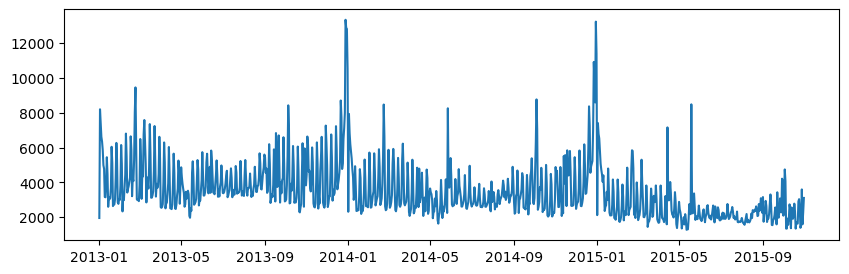

In [6]:
plt.figure(figsize=(10,3))
plt.plot(data_by_day)

### 過去7日間から次の日の売上数を予測するためのデータセットを作成

In [30]:
np.stack([data.item_cnt_day[1:7].values, data.item_cnt_day[1:7].values])

array([[ 1., -1.,  1.,  1.,  1.,  1.],
       [ 1., -1.,  1.,  1.,  1.,  1.]])

In [112]:
def making_dataset(
        ds: pd.Series,
        span=7,
        train_rate=0.9)-> list[tuple[np.ndarray, np.ndarray]]:
    data = ds.copy()
    endpoint = len(data) - span
    # [(入力データ, 正解データ)...]
    x_data = np.stack([data[i: i+span] for i in range(0, endpoint)])
    y_data = np.stack([data[i+span] for i in range(0, endpoint)])

    size = int(len(data_by_day)*0.9)
    x_train = x_data[:size, :]
    x_test = x_data[size:, :]
    y_train = y_data[:size]
    y_test = y_data[size:]

    return x_train, x_test, y_train, y_test

In [121]:
pack = making_dataset(data_by_day)
pack[1]

array([[1954., 2045., 1872., 1872., 1897., 2320., 1722.],
       [2045., 1872., 1872., 1897., 2320., 1722., 1705.],
       [1872., 1872., 1897., 2320., 1722., 1705., 1744.],
       [1872., 1897., 2320., 1722., 1705., 1744., 1752.],
       [1897., 2320., 1722., 1705., 1744., 1752., 1720.],
       [2320., 1722., 1705., 1744., 1752., 1720., 1796.],
       [1722., 1705., 1744., 1752., 1720., 1796., 1953.],
       [1705., 1744., 1752., 1720., 1796., 1953., 1771.],
       [1744., 1752., 1720., 1796., 1953., 1771., 1659.],
       [1752., 1720., 1796., 1953., 1771., 1659., 1642.],
       [1720., 1796., 1953., 1771., 1659., 1642., 1560.],
       [1796., 1953., 1771., 1659., 1642., 1560., 1764.],
       [1953., 1771., 1659., 1642., 1560., 1764., 1972.],
       [1771., 1659., 1642., 1560., 1764., 1972., 2179.],
       [1659., 1642., 1560., 1764., 1972., 2179., 1702.],
       [1642., 1560., 1764., 1972., 2179., 1702., 1854.],
       [1560., 1764., 1972., 2179., 1702., 1854., 1731.],
       [1764.,

In [122]:
pack[3]

array([1705., 1744., 1752., 1720., 1796., 1953., 1771., 1659., 1642.,
       1560., 1764., 1972., 2179., 1702., 1854., 1731., 1696., 1765.,
       1885., 2201., 1948., 2402., 2340., 2305., 2429., 2361., 2620.,
       2453., 2063., 2090., 2752., 2363., 2564., 3086., 2719., 2250.,
       3154., 1738., 2193., 2232., 2933., 2638., 1723., 1935., 1919.,
       2176., 2700., 3304., 2660., 1551., 1540., 1844., 1887., 2118.,
       2556., 2236., 1586., 3428., 2064., 1966., 2317., 3075., 2818.,
       2275., 4209., 4068., 2085., 3265., 4742., 4069., 1340., 1343.,
       1914., 1561., 1922., 2732., 2454., 1363., 2556., 2294., 1908.,
       2143., 2775., 2330., 1341., 1711., 1647., 1632., 2901., 3035.,
       2495., 1387., 1551., 3593., 1589., 2274., 3104.])